### Grunduppgift del 1

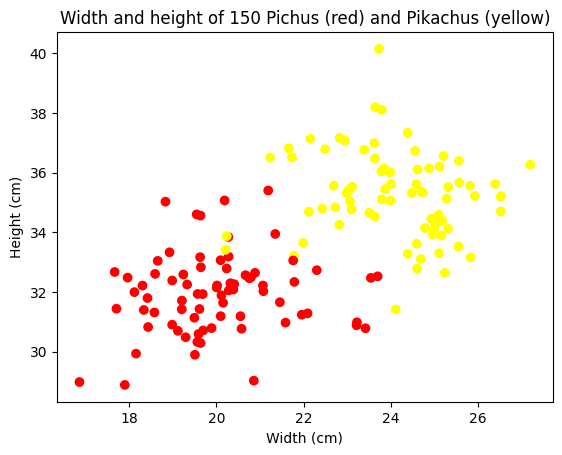

In [49]:
import csv
import matplotlib.pyplot as plt

# Create a function to read datapoints.txt and return a list of dictionaries
def readDatafile():
# Create a list to store the observations or rows as dictionaries from the datapoints.txt file
    observations = []

    with open('data\\datapoints.txt') as data_file:
        r = csv.DictReader(data_file)

        # Append each observation as dictionaries and map the column names to the keys
        # There is a third comma in the file inside the column names wich creates a fourth column, 
        # that column is empty and can be ignored. The label values are correctly placed in the third column.
        for obs in r:
            observations.append({'width': float(obs['(width (cm)'].strip()), 
                                'height': float(obs[' height (cm)'].strip()), 
                                'label': int(obs[' label (0-pichu'].strip())})
    return observations

observations = readDatafile()

# Create lists for the x and y variables to be used in the plot. x is width and y height.
# Create a list for the colors to be used for each observation based on the label.
x = [obs['width'] for obs in observations]
y = [obs['height'] for obs in observations]
colors = ['yellow' if obs['label'] == 1 else 'red' for obs in observations]

# Plot the observations
plt.title('Width and height of 150 Pichus (red) and Pikachus (yellow)')
plt.xlabel('Width (cm)')
plt.ylabel('Height (cm)')
plt.scatter(x, y, c=colors)


### Grunduppgift del 2

In [50]:
import math

# Define a function that returns the two dimensional euclidean distance between two points (p, q)
def euclidean_distance(p1, p2, q1, q2):
    return math.sqrt((p1 - q1) ** 2 + (p2 - q2) ** 2)

# Create a list to store the data from testpoints.txt
test_points = []

# Read testpoints.txt and append the content on test_points split on lines and comma
with open('data\\testpoints.txt') as test_file:
    r = test_file.readlines()

    for content in r:
        test_points.append(content.split(', '))

# Remove the data from the first row in testpoints.txt ("Test points:")
test_points.pop(0)

# Create an empty list and use it to store the test points in form of dictionaries. Width and height are given by 
# the test_points list, create the keys min_distance and classified_as used for the classification calculation
test_points_dicts = []

for point in test_points:
    test_points_dicts.append({'width': float(point[0][4:]),
                              'height': float(point[1][:-2]),
                              'min_distance': '',
                              'classified_as': ''})
    
# Define a function that takes a list of dictionaries with the same keys as the observations list as training_data, and 
# a list of dictionaries with the same form as the test_points_list as test_data. It returns the list passed as the 
# test_data argument with new values for the keys min_distance and classified_as
def pichuPikachuClassification(training_data, test_data):

    # Get index to update the correct dictionary in the test_points_dict in the if-statement below
    for index_test, test_point in enumerate(test_data):

        # Get index to use in the if-statement below
        for index, obs in enumerate(training_data):
        
            d = euclidean_distance(test_point['width'], test_point['height'], obs['width'], obs['height'])
            
            # Update min_distance for the test point if its empty (its first iteration), or if it finds a point with a
            # smaller distance. Update classified_as at the same time to know the class of the closest training point.
            if index == 0 or d < test_data[index_test]['min_distance']:
                test_data[index_test]['min_distance'] = d
                test_data[index_test]['classified_as'] = obs['label']
            
    return test_data

# Call the classifier function and print the results for each test point
results = pichuPikachuClassification(observations, test_points_dicts)

for result in results:
    print(f'Sample with (width, height): ({result["width"]}, {result["height"]}) \
classified as {"Pikachu" if result["classified_as"] == 1 else "Pichu"}')


Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


### Uppgift nr. 1

In [63]:
# Store user input in a variable
input_testpoint = input('Enter a test point (width (cm),height (cm)), ex. 22.7,33')

# Create an empty list to store the input point in as a dictionary
input_test_data = []

# callFunction decides if the classification function will be run, it will as long as the user input is valid
callFunction = 1

# try to create a list with a dictionary with key values 'width' and 'height' from the input variable. It slices the 
# input based on the comma, if there is no comma it assigns empty values. If the input values are not numeric, 
# the float conversion throws an error and prints out an error message in the except-statement.
# The else statement contains two checks, one for invalid lenghts and one for 0 or negative input numbers, if either 
# is true, or the except statement is executed, the callFunction variable is set to 0.
try:
    input_test_data = [{'width': float(input_testpoint[:input_testpoint.find(',')]) if input_testpoint.find(',') >= 0 else '',
                        'height': float(input_testpoint[input_testpoint.find(',') + 1:]) if input_testpoint.find(',') >= 0 else '',
                        'min_distance': '',
                        'classified_as': ''}]
except:
    print('Invalid input, values should be two positive numbers with a comma seperating them')
    callFunction = 0
else:
    if len(str(input_test_data[0]['width'])) == 0 or len(str(input_test_data[0]['height'])) == 0:
        print('Invalid input, you need to input two values, separated with a comma ex. 22.7,33')
        callFunction = 0

    elif input_test_data[0]['width'] <= 0 or input_test_data[0]['height'] <= 0:
        print('Invalid input, values must be greater than 0')
        callFunction = 0

# Call the classification function with the user input as the test data argument and print the result
if callFunction == 1:
    results = pichuPikachuClassification(observations, input_test_data)
    print(f'Entered test point is probably a {"Pikachu" if results[0]["classified_as"] == 1 else "Pichu"}')


Entered test point is probably a Pikachu


### Uppgift nr. 2

In [103]:

# Create a new function with the same parameters as pichuPikachuClassification but different functionality
def pichuPikachuClassificationMean(training_data, test_data):

    for index_test, test_point in enumerate(test_data):

        # Create an empty list to store the lowest distances between the test point and training points
        distances = []

        for index, obs in enumerate(training_data):
        
            d = euclidean_distance(test_point['width'], test_point['height'], obs['width'], obs['height'])
            
            # Append both the distance to and label of the training points
            distances.append([d, obs['label']])

        # Sort the distance list and keep the lowest 10. Sorting a nested list will order the items based on the 
        # first item in the sub lists -källhänvisning
        distances = sorted(distances)
        distances = distances[:10]

        # Create a sum variable that adds the label value for each of the 10 training points, Pikachu == 1
        sum_pikachu = 0

        for distance in distances:
            sum_pikachu += distance[1]

        # Classify the testing point based on sum_pikachu, if equal use the label of the closest training point
        if sum_pikachu > 5:
            test_data[index_test]['classified_as'] = 1
        elif sum_pikachu < 5:
            test_data[index_test]['classified_as'] = 0
        else:
            test_data[index_test]['classified_as'] = distance[1]
            
    return test_data

results = pichuPikachuClassificationMean(observations, test_points_dicts)

for result in results:
    print(f'Sample with (width, height): ({result["width"]}, {result["height"]}) \
classified as {"Pikachu" if result["classified_as"] == 1 else "Pichu"}')

Sample with (width, height): (25.0, 32.0) classified as Pikachu
Sample with (width, height): (24.2, 31.5) classified as Pikachu
Sample with (width, height): (22.0, 34.0) classified as Pikachu
Sample with (width, height): (20.5, 34.0) classified as Pichu


### Bonusuppgifter

Average accuracy of the 10 experiments: 0.95


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

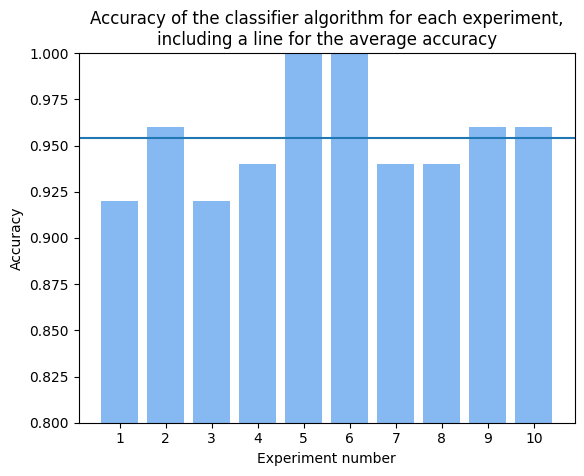

In [104]:
import random

# Create an empty list to store the accuracy of each of the 10 experiments
experimentsAccuracy = []

# Create a function to perform one experiment
def randomizedExperiment():

    # Store the 150 datapoints of datapoints.txt
    observations = readDatafile()

    # Create empty lists for the randomized training- and test data
    training_set = []
    test_set = []

    # Randomize the order of the datapoints
    random.shuffle(observations)

    # For-loop to iterate through the datapoints and append them to the test set and remove them from the base list, 
    # use two counters to keep track of the number of Pikachus and Pichus, stop the loop when both counters reach 25
    count_pikachu = 0
    count_pichu = 0

    for i in observations:
        if i['label'] == 1 and count_pikachu < 25:
            test_set.append(observations.pop(observations.index(i)))
            count_pikachu += 1
        elif i['label'] == 0 and count_pichu < 25:
            test_set.append(observations.pop(observations.index(i)))
            count_pichu += 1

    # Training set gets the remaining 50 Pikachus and 50 Pichus, new variable to make it clearer............
    training_set = observations

    # Add two keys for the data points in test_set, needed for the classifier function
    for test_point in test_set:
        test_point.update({'min_distance': ''})
        test_point.update({'classified_as': ''})

    # Call the classifier function to classify each test point, store the result in the res variable
    results = pichuPikachuClassificationMean(training_set, test_set)

    # Calculate the accuracy of the results and count TP, TN, FP and FN
    TP_sum = 0
    TN_sum = 0
    FP_sum = 0
    FN_sum = 0

    for test_point in results:
        if test_point['label'] == 1 and test_point['classified_as'] == 1:
            TP_sum += 1
        elif test_point['label'] == 1 and test_point['classified_as'] == 0:
            FN_sum += 1
        elif test_point['label'] == 0 and test_point['classified_as'] == 1:
            FP_sum += 1
        elif test_point['label'] == 0 and test_point['classified_as'] == 0:
            TN_sum += 1

    # Return the accuracy
    return (TP_sum + TN_sum) / (TP_sum + TN_sum + FP_sum + FN_sum)

# Set the number of experiments and perform them in a for-loop, append the accuracy results on the experimentAccuracy list
nbrOfExperiments = 10

for i in range(nbrOfExperiments):
    experimentsAccuracy.append(randomizedExperiment())

# Calculate and print the average accuracy of all experiments
averageAccuracy = sum(experimentsAccuracy) / nbrOfExperiments

print(f'Average accuracy of the {nbrOfExperiments} experiments: {round(averageAccuracy, 2)}')

# Create a bar plot, each bar represents the accuracy of one experiment. axhline draws a horizontal line of the 
# average accuracy
plt.bar(range(1, 11), experimentsAccuracy, color='#86B8F2')
plt.ylim(0.8, 1)
plt.xticks(range(1, 11))
plt.axhline(averageAccuracy)
plt.title('Accuracy of the classifier algorithm for each experiment,\nincluding a line for the average accuracy')
plt.xlabel('Experiment number')
plt.ylabel('Accuracy')
plt.plot